In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('WorldCupMatches.csv') # Los datos son de: https://www.kaggle.com/abecklas/fifa-world-cup
df = df[['Year','Stage','Home Team Initials','Home Team Goals','Away Team Initials','Away Team Goals']]
df.columns = ['year', 'stage','home_team','home_goals','away_team','away_goals']
df.head()

,year,stage,home_team,home_goals,away_team,away_goals
0,1930,Group 1,FRA,4,MEX,1
1,1930,Group 4,USA,3,BEL,0
2,1930,Group 2,YUG,2,BRA,1
3,1930,Group 3,ROU,3,PER,1
4,1930,Group 1,ARG,1,FRA,0


In [2]:
df.describe()

,year,home_goals,away_goals
count,852.000000,852.000000,852.000000
mean,1985.089202,1.811033,1.022300
std,22.448825,1.610255,1.087573
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,2.000000,1.000000
75%,2002.000000,3.000000,2.000000
max,2014.000000,10.000000,7.000000


In [3]:
df['diff'] = (df['home_goals'] - df['away_goals']).abs()
df.head()

,year,stage,home_team,home_goals,away_team,away_goals,diff
0,1930,Group 1,FRA,4,MEX,1,3
1,1930,Group 4,USA,3,BEL,0,3
2,1930,Group 2,YUG,2,BRA,1,1
3,1930,Group 3,ROU,3,PER,1,2
4,1930,Group 1,ARG,1,FRA,0,1


In [4]:
df['result'] = 'Otro'
for r1 in reversed(range(10)):
    for r2 in reversed(range(r1+1)):
        df.loc[((df['home_goals']==r1) & (df['away_goals']==r2)) | ((df['home_goals']==r2) & (df['away_goals']==r1)), 'result'] = str(r1)+':'+str(r2)
df.head()

,year,stage,home_team,home_goals,away_team,away_goals,diff,result
0,1930,Group 1,FRA,4,MEX,1,3,4:1
1,1930,Group 4,USA,3,BEL,0,3,3:0
2,1930,Group 2,YUG,2,BRA,1,1,2:1
3,1930,Group 3,ROU,3,PER,1,2,3:1
4,1930,Group 1,ARG,1,FRA,0,1,1:0


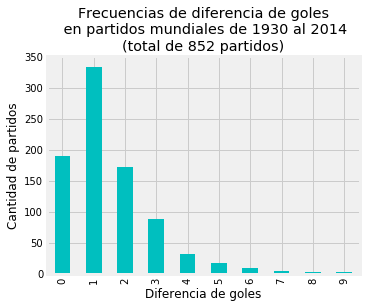

In [5]:
plt.title("Frecuencias de diferencia de goles\n en partidos mundiales de 1930 al 2014\n(total de 852 partidos)")
ax = (df.groupby(['diff']).count()['year']).plot.bar(figsize=(5,4), color='c')
ax.set_xlabel("Diferencia de goles")
ax.set_ylabel("Cantidad de partidos")
plt.savefig('diferencia_goles')

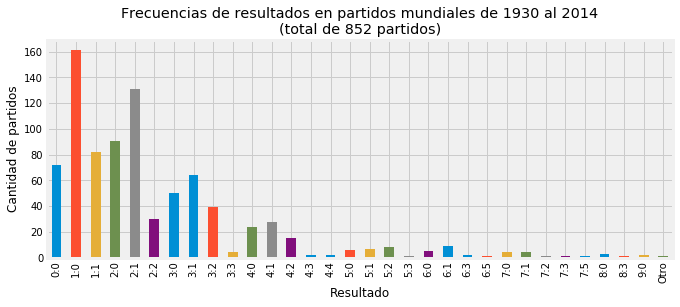

In [6]:
plt.title("Frecuencias de resultados en partidos mundiales de 1930 al 2014\n(total de 852 partidos)")
ax = (df.groupby(['result']).count()['year']).plot.bar(figsize=(10,4))
ax.set_xlabel("Resultado")
ax.set_ylabel("Cantidad de partidos")
plt.savefig('resultados')